<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/soluciones/04-Polinomial-Regression-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Regresión Polinomial


Usaremos el siguiente dataset de datos de peces. Hay un total de 159 filas (muestras de entrenamiento) y 7 columnas en el conjunto de datos.

Los detalles de cada columna son los siguientes

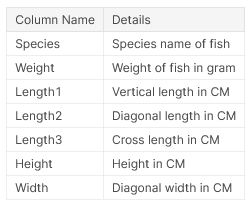

* Las variables independientes son "Especie", "Longitud1", "Longitud2", "Longitud3", "Altura" y "Anchura".
* La variable dependiente es "Peso".

Tenemos que estimar el peso del pez basándonos en sus valores de medición.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/fishes.csv'
df = pd.read_csv(url)
df

⭕ Práctica

Construye un modelo de Regresión Lineal (Polinomial) para predecir el peso de un pez en función de las variables predictoras.

**Preprocesamiento**

* Verifica si hay valores faltantes.
* Verifica la correlación entre variables usando el método [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad. **Prueba con ambas opciones:** dejar todas las variables o no.
* Explora la relación entre pares de variables usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de seaborn. Esto te puede ayudar a visualizar qué variables están más correlacionadas con la variable a predecir, además, de dar una idea de cómo es la relación.
* Verifica el rango de las variables (no solamente el rango, sino también el máximo y mínimo). **Prueba con diferentes tipos de re-escalamiento y sin re-escalamiento**.
* Usar PolinomialFeatures en función de tus observaciones del punto anterior. **Prueba con diferentes grados del polinomio.**
* Usa la codificación one-hot para la(s) variable(s) categórica(s). **Prueba ambas opciones: incluye esta variable o no.**

**Regresión Lineal**

Entrena un modelo de RL separando el 80% para entrenamiento y reporta la métrica de rendimiento MAE y MSE. **Además, prueba usando regularización**



**Pasos a realizar**

1.   Primero prueba con el siguiente modelo: Regresión Polinomial de grado 2 con todas las variables numéricas, sin re-escalamiento, sin la variable categórica (intenta implementarlo como pipeline).
2.  El mismo modelo anterior pero implementado como pipeline, en caso de que no lo hayas hecho así en el punto anterior.
3.  Prueba diferentes modelos considerando las combinaciones de técnicas descritas arriba. Reporta el modelo que haya logrado el RMSE más bajo.



**Responde las siguientes preguntas:**

* ¿Qué efecto tiene dejar todas las variables contra quitar variables correlacionadas?
* ¿Cuál es el grado que mejor funcionó?

## Análisis Exploratorio

In [ ]:
df.iloc[:,1:].corr()

In [ ]:
from seaborn import pairplot
import matplotlib.pyplot as plt

pairplot(df.iloc[:,1:])

Separamos la variable dependiente

In [ ]:
y = df['Weight'].values
print(y.shape)

df.drop(columns='Weight',inplace=True)

### Variables correlacionadas


In [ ]:
df

Usamos todas las variables numéricas

In [ ]:
X = df.iloc[:,1:].values
print(X.shape)

Quitamos las variables correlacionadas: Nos quedamos solamente con `Lenght1` de las tres longitudes.



In [ ]:
X = df.iloc[:,[1,4,5]].values  # Quitar variables correlacionadas
print(X.shape)

### Variables categóricas

In [ ]:
df['Species'].unique()

Realizamos la codificación *one-hot* cuidando de quitar una de las columnas finales para no introducir una variable colineal.

In [ ]:
df = pd.get_dummies(df,dtype='int',drop_first=True)
df

Usamos las variables categóricas y todas las numéricas

In [ ]:
X = df.values
X.shape

Usamos las variables categoricas y las numéricas no multicolineales

In [ ]:
import numpy as np

X_cat = df.iloc[:,5:].values
print(X_cat.shape)
X = np.hstack((X,X_cat))
X.shape

## Pipeline

El siguiente intento usa:

*   Las variables numéricas sin multicolinealidad (Length1, Width y Height) y las categóricas (sin contar la última para evitar multicolinealidad).
*   Escalamiento `StandardScaler`
*   Regresión polinomial de grado 2 con regularización Ridge $\alpha=0.5$

El MSE en el conjunto de entrenamiento es $≈2533.626$.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=57)

pl = Pipeline([
               ('scl',StandardScaler()),
               ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',Ridge(0.5))])

pl.fit(X_train,y_train)
print(f"R2 en el conjunto de entrenamiento: {pl.score(X_train,y_train)}")

y_pred = pl.predict(X_test)
print(f"MSE en el conjunto de prueba {mean_squared_error(y_test,y_pred)}")

## Un ejemplo de overfitting

El siguiente es un claro ejemplo de overfitting. Observa cómo la métrica de rendimiento es mucho mejor en el conjunto de entrenamiento que en el conjunto de prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=57)

pl = Pipeline([
               ('scl',StandardScaler()),
               ('pf',PolynomialFeatures(degree=10,include_bias=False)),
               ('lr',LinearRegression())])

pl.fit(X_train,y_train)
print(f"R2 en el conjunto de entrenamiento: {pl.score(X_train,y_train)}")

y_train_pred = pl.predict(X_train)
print(f"MSE en el conjunto de entrenamiento {mean_squared_error(y_train,y_train_pred)}")
y_pred = pl.predict(X_test)
print(f"MSE en el conjunto de prueba {mean_squared_error(y_test,y_pred)}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_train,y_train_pred,label='Entrenamiento')
plt.scatter(y_test,y_pred,label='Prueba')
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

## Probando varias opciones

Probemos varios algoritmos para regresión:

In [ ]:
estimadores = [LinearRegression(),Ridge(0.5),Ridge(5),Lasso(1),Lasso(5),ElasticNet(1),ElasticNet(1)]

min_error = 10000

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=57)

for E in estimadores:
    pl = Pipeline([
                ('scl',StandardScaler()),
                ('pf',PolynomialFeatures(degree=2,include_bias=False)),
                ('lr',E)])
    pl.fit(X_train,y_train)
    y_pred = pl.predict(X_test)
    error = mean_squared_error(y_test,y_pred)
    if error < min_error:
        min_error = error
        print(f"Error MSE mínimo: {min_error}")
        print(E)

## Otros regresores

Hay más algoritmos para hacer regresión. Algunos de ellos son:

* [K nearest neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

En cada uno de ellos, hay que aprender cómo funciona el método para aprender a elegir los hiperparámetros.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=57)

# pl = Pipeline([('scl',StandardScaler()),
#                ('lr',KNeighborsRegressor())])

pl = Pipeline([('scl',StandardScaler()),
               ('lr',DecisionTreeRegressor(criterion='squared_error'))])

pl.fit(X_train,y_train)
print(f"Score en el conjunto de entrenamiento: {pl.score(X_train,y_train)}") # coefficient of determination of the prediction

y_pred = pl.predict(X_test)
print(f"MSE en el conjunto de prueba {mean_squared_error(y_test,y_pred)}")